In [1]:
import albumentations as A
from PIL import Image
from skimage.io import imread
import matplotlib.pyplot as plt
# transparams = [
#    # A.RandomSizedCrop(min_max_height=(64, 512), height=512, width=512, w2h_ratio=1.0, interpolation=1, always_apply=False, p=0.75),
#    # A.HorizontalFlip(p=0.5),
#     #A.VerticalFlip(p=0.5),
#     #A.RandomBrightnessContrast(p=1),
#    # A.GaussNoise(always_apply=True, var_limit=(8,8)),
#   #  A.RandomContrast(always_apply=False, p=0.3, limit=(-0.6, 0.6)),
#     #A.RandomRotate90(always_apply=False, p=0.75),
#     A.ElasticTransform(p=1, alpha=500, sigma=40, alpha_affine=8),
#    #A.OpticalDistortion (distort_limit=0.05, shift_limit=0.05, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=1),
#    # A.GridDistortion (num_steps=5, distort_limit=0.2, interpolation=1, border_mode=4, value=None, mask_value=None, normalized=True, always_apply=False, p=1)
# ]

In [2]:
transparams = [
        A.GridDistortion (num_steps=5, p=0.5),
        A.RandomSizedCrop([64,1024], 256, 256, w2h_ratio = 1, p=1.0),
       # A.RandomSizedCrop(min_max_height=(64, 512), height=512, width=512, w2h_ratio=1.0, interpolation=1, always_apply=False, p=0.75),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomBrightnessContrast(p=1),
        A.GaussNoise(p=1, var_limit=[0.0002,0.0008]),
      #  A.RandomContrast(always_apply=False, p=0.3, limit=(-0.6, 0.6)),
       # A.RandomRotate90(always_apply=False, p=0.75)
       # A.CLAHE(p=1),
       # A.Emboss (alpha=(0.2, 0.5), strength=(0.1, 0.7), always_apply=False, p=0.2),
       # A.RandomFog (fog_coef_lower=0.3, fog_coef_upper=1, alpha_coef=0.08, always_apply=False, p=1),
       # A.RandomGamma (gamma_limit=(80, 120), eps=None, always_apply=False, p=1),
       # A.RandomRain (slant_lower=-10, slant_upper=10, drop_length=20, drop_width=1, drop_color=(200, 200, 200), blur_value=7, brightness_coefficient=0.7, rain_type=None, always_apply=False, p=1),
        #A.Spatter (mean=0.65, std=0.3, gauss_sigma=2, cutout_threshold=0.68, intensity=0.6, mode='rain', color=None, always_apply=False, p=1),
        #A.PiecewiseAffine (scale=(0.03, 0.05), nb_rows=4, nb_cols=4, interpolation=1, mask_interpolation=0, cval=0, cval_mask=0, mode='constant', absolute_scale=False, always_apply=False, keypoints_threshold=0.01, p=0.5)
        A.ElasticTransform(p=1, alpha=500, sigma=40, alpha_affine=8),
]

In [3]:
from PIL import Image
import numpy as np
im = Image.open("../data/test.tiff")
imnp = np.array(im)
#imnp = (imnp-imnp.mean())/np.std(imnp)
imnp = imnp/imnp.max()
ma = Image.open("../data/testmask.tiff")
manp = np.array(ma)
transform1 = A.Compose(transparams)
transformed1 = transform1(image=imnp, mask=manp)
x = transformed1['image']
y = transformed1['mask']


In [4]:
imnp.max()

1.0

In [5]:
imnp.min()

0.0

In [6]:
x.max()

0.39394754

In [7]:
x.min()

0.00090278115

In [8]:
x

array([[0.26324755, 0.29627612, 0.28351757, ..., 0.27527884, 0.26058748,
        0.2489731 ],
       [0.26240584, 0.26315737, 0.27315935, ..., 0.2984168 , 0.29512793,
        0.27240074],
       [0.26276731, 0.29575992, 0.28287035, ..., 0.30838057, 0.29935068,
        0.26704502],
       ...,
       [0.21551313, 0.22400093, 0.21528773, ..., 0.23098466, 0.23127303,
        0.25432068],
       [0.20619231, 0.20287643, 0.20611832, ..., 0.23244521, 0.24701948,
        0.25815648],
       [0.22242153, 0.21789102, 0.22239573, ..., 0.25790182, 0.26910177,
        0.27703148]], dtype=float32)

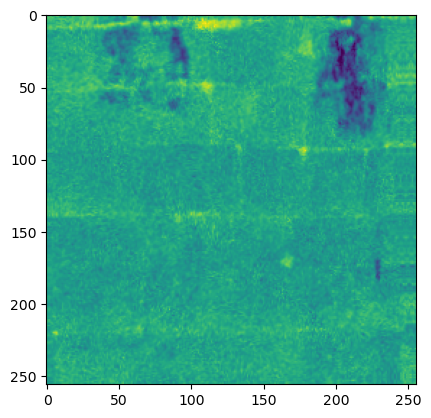

In [9]:
plt.imshow(x)

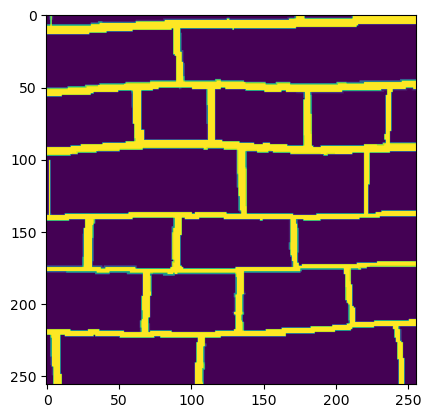

In [10]:
plt.imshow(y)